**MACHINE LEARNING ASSIGNMENT ONE**

**NAME :KUGUMA VICTOR **

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Get the file name from the uploaded files
file_name = list(uploaded.keys())[0]

# Read the Excel file
df = pd.read_excel(file_name)



Saving data.xlsx to data.xlsx


In [ ]:
# Print the first five rows
print("First five rows:")
print(df.head())

First five rows:
  sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


**Basic EDA**

In [ ]:
# Summary statistics
summary_stats = df.describe(include='all')
print(summary_stats)

         sex       length     diameter       height  whole_weight  \
count   4177  4177.000000  4177.000000  4177.000000   4177.000000   
unique     3          NaN          NaN          NaN           NaN   
top        M          NaN          NaN          NaN           NaN   
freq    1528          NaN          NaN          NaN           NaN   
mean     NaN     0.523992     0.407881     0.139516      0.828742   
std      NaN     0.120093     0.099240     0.041827      0.490389   
min      NaN     0.075000     0.055000     0.000000      0.002000   
25%      NaN     0.450000     0.350000     0.115000      0.441500   
50%      NaN     0.545000     0.425000     0.140000      0.799500   
75%      NaN     0.615000     0.480000     0.165000      1.153000   
max      NaN     0.815000     0.650000     1.130000      2.825500   

        shucked_weight  viscera_weight  shell_weight        rings  
count      4177.000000     4177.000000   4177.000000  4177.000000  
unique             NaN             

**Analysing the Distribution of the numeric Features**

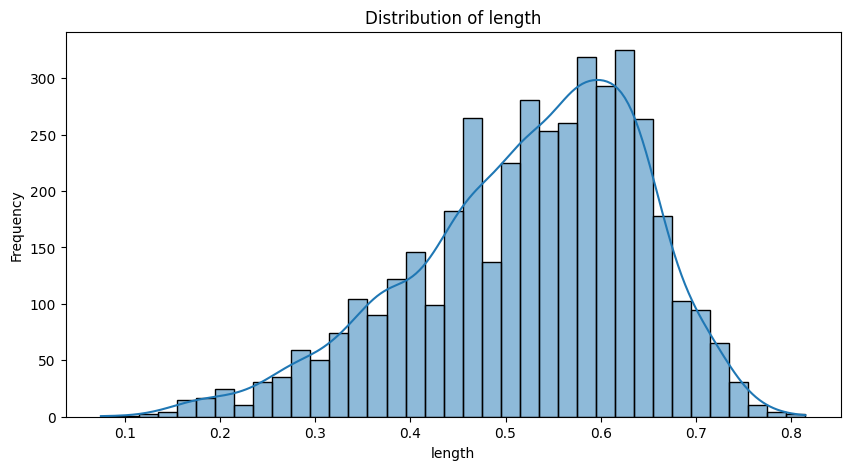

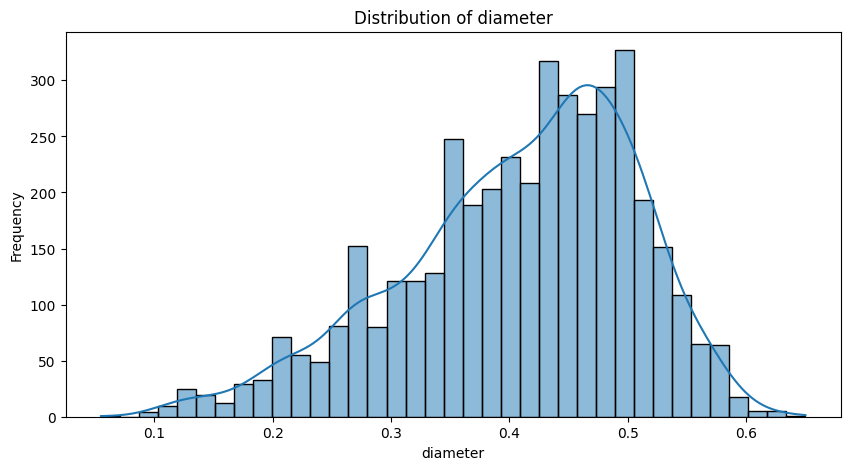

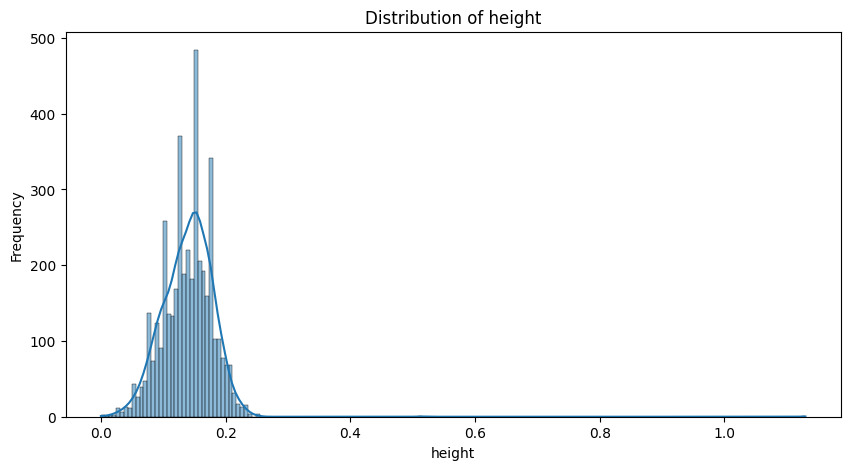

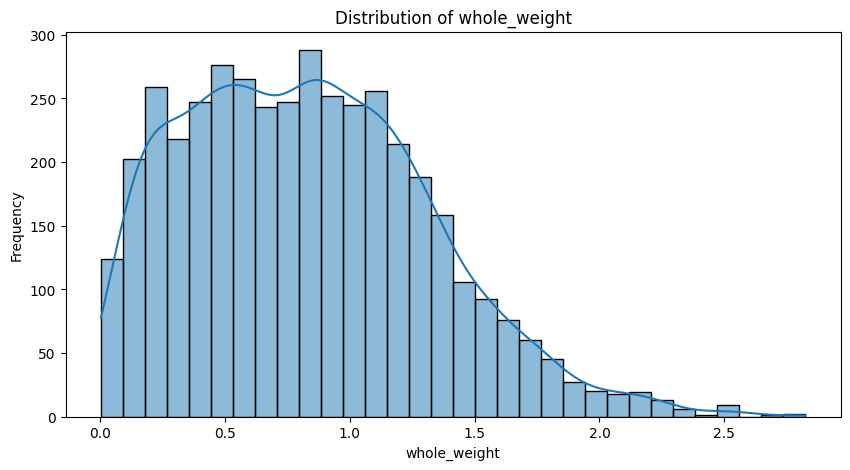

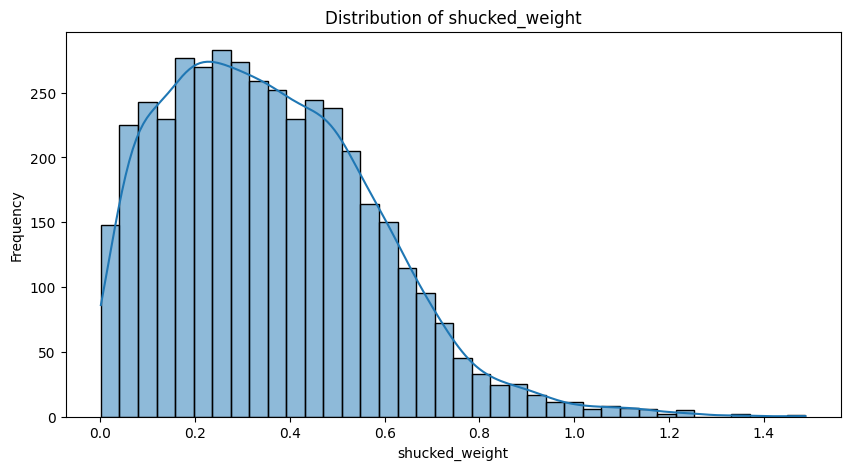

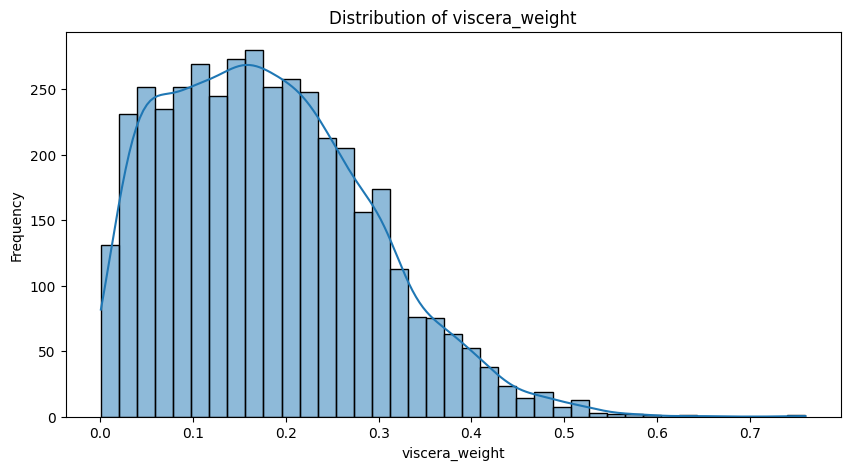

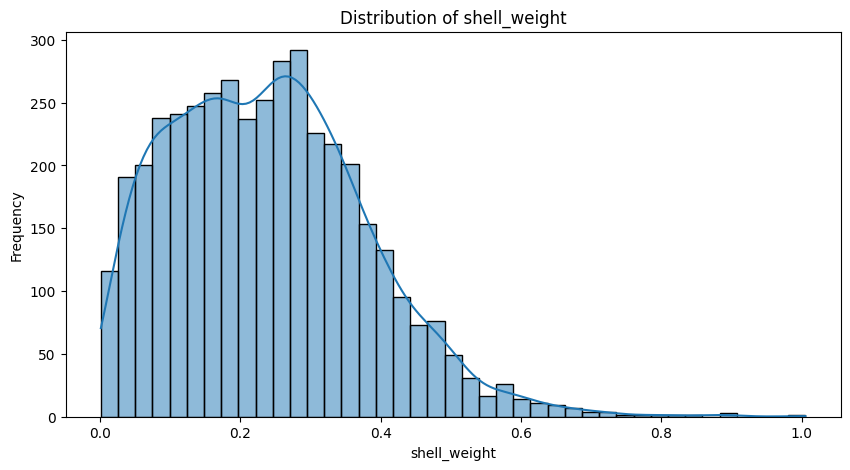

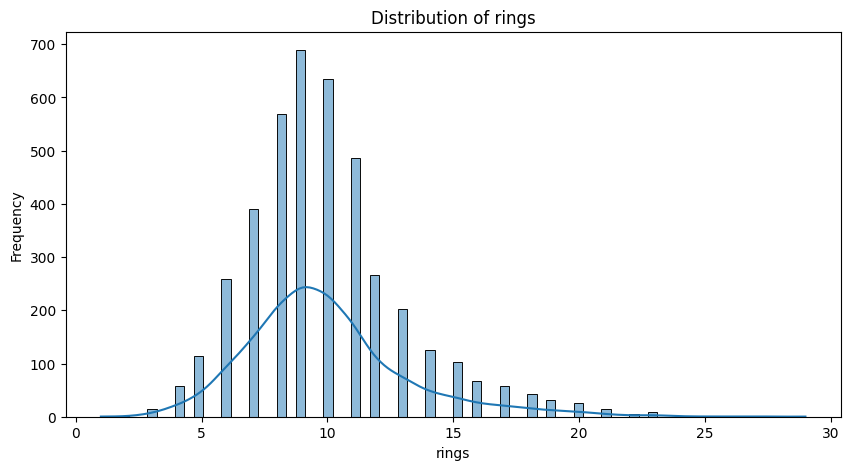

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions
features = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

for feature in features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


**Correlation Analysis**

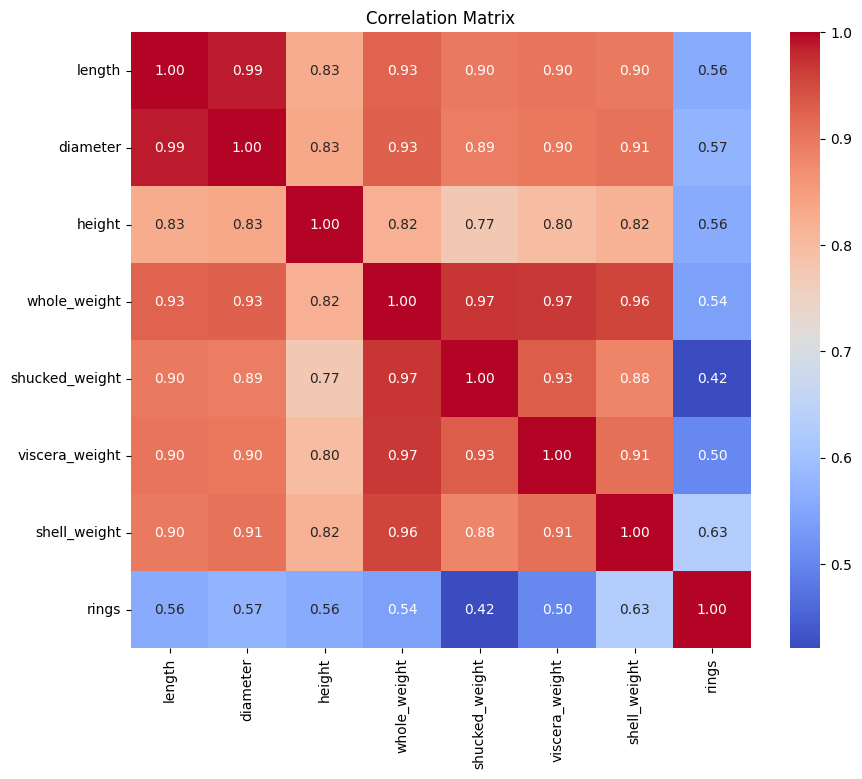

In [ ]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


**Categorical Analysis**

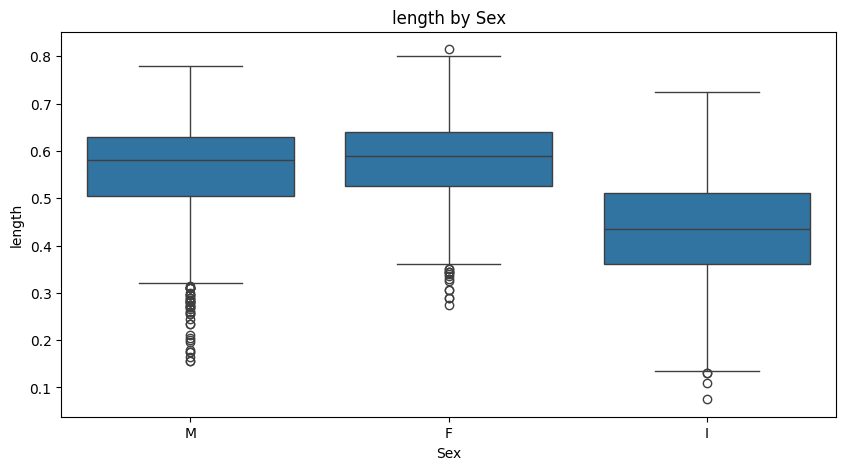

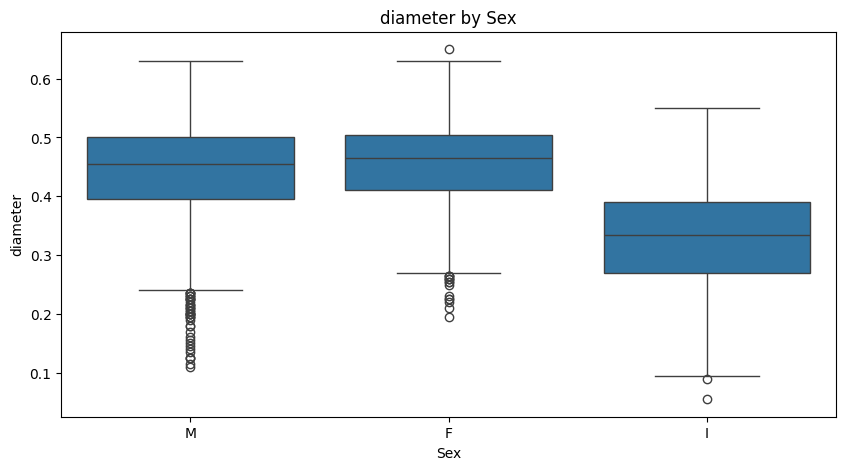

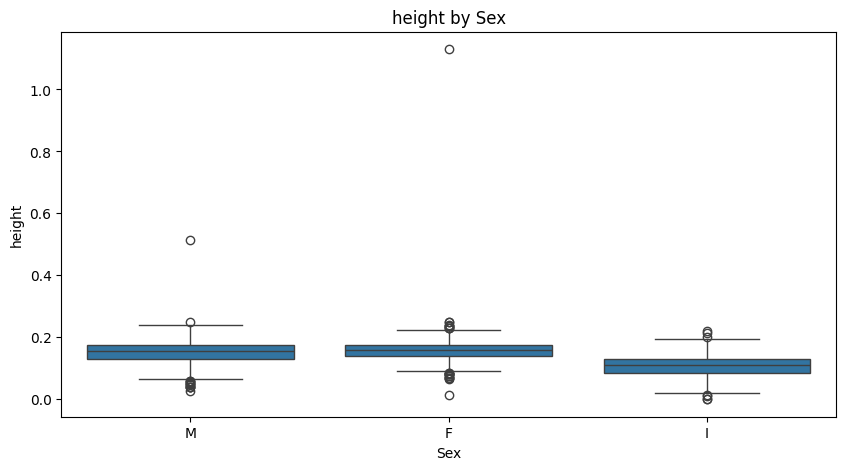

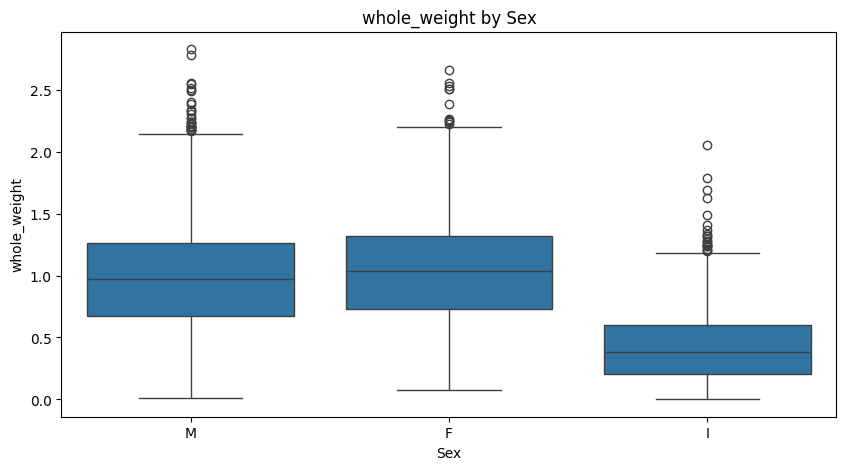

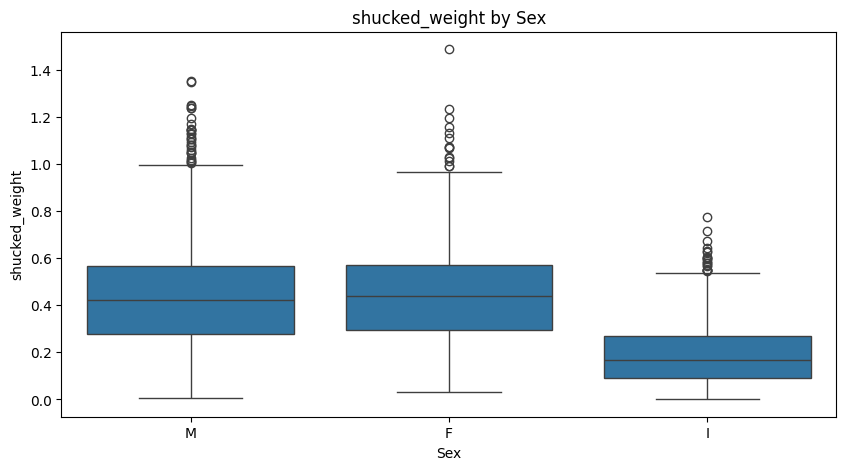

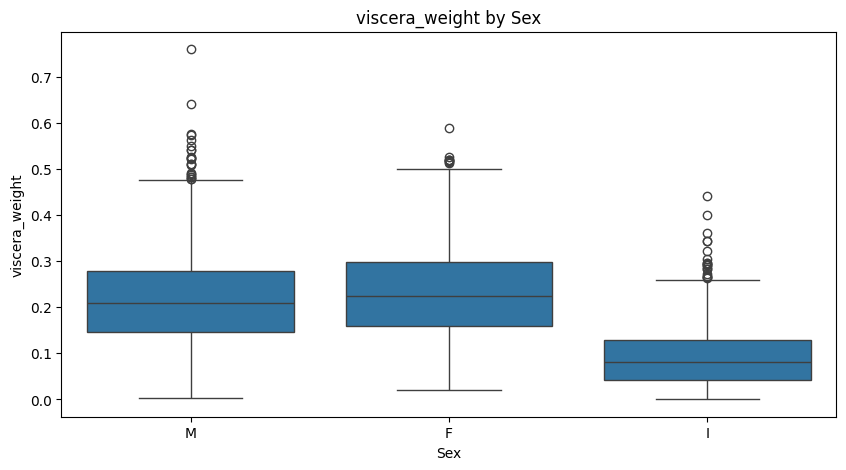

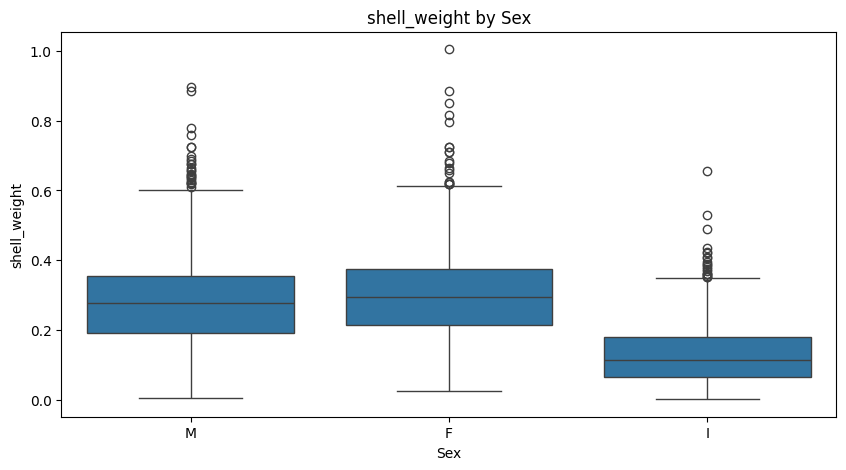

In [ ]:
# Boxplots for numerical features by sex
for feature in features:
    if feature != 'rings':
        plt.figure(figsize=(10, 5))
        sns.boxplot(x='sex', y=feature, data=df)
        plt.title(f'{feature} by Sex')
        plt.xlabel('Sex')
        plt.ylabel(feature)
        plt.show()


**Target Analysis**

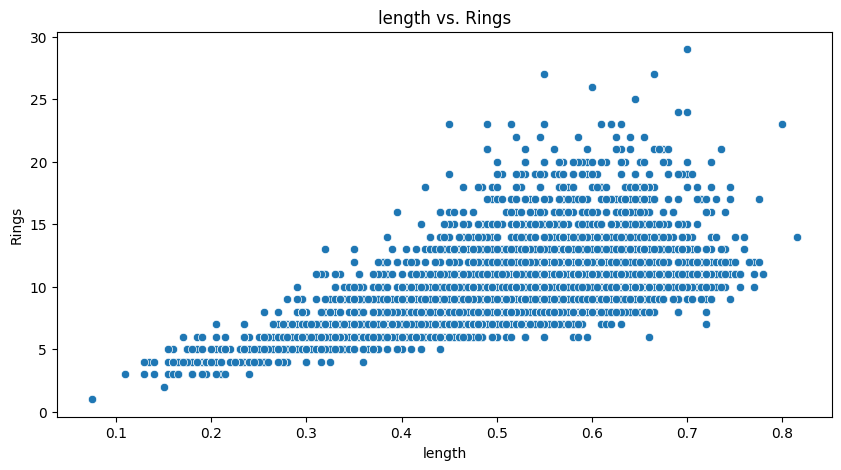

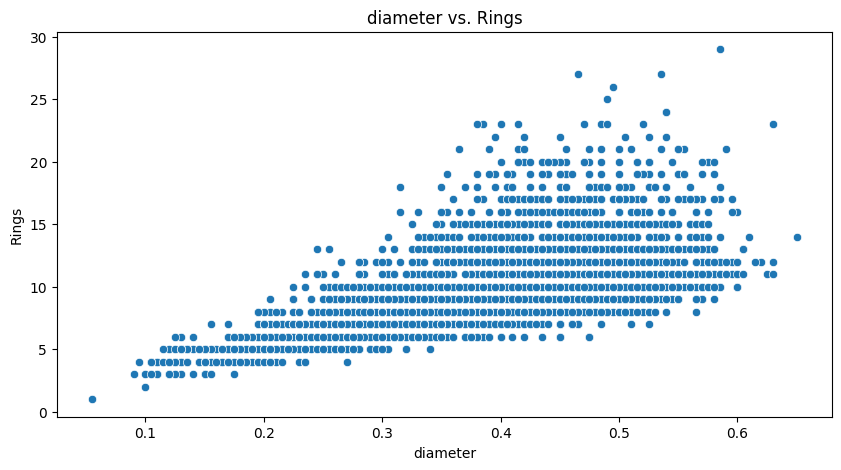

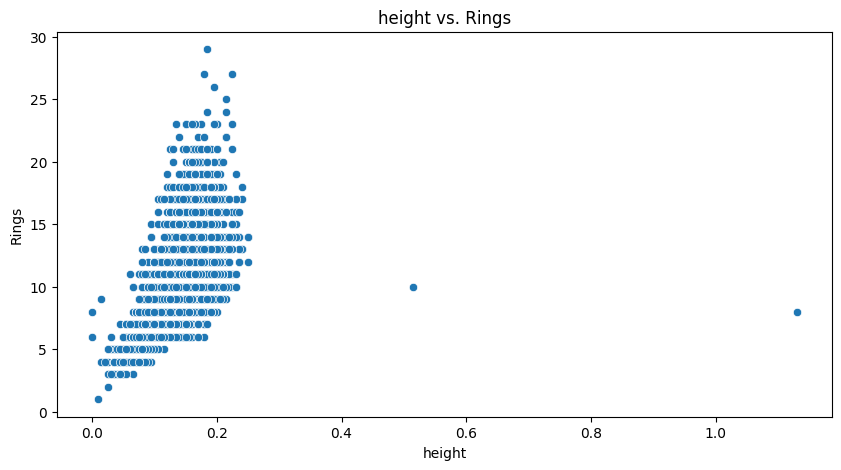

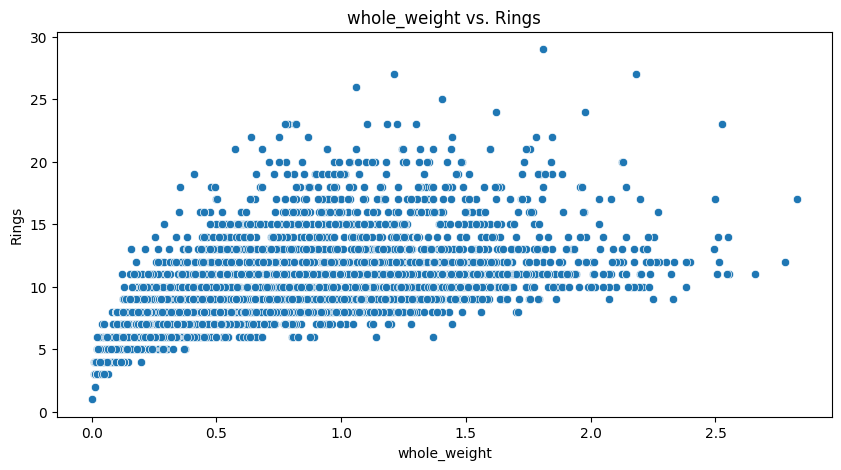

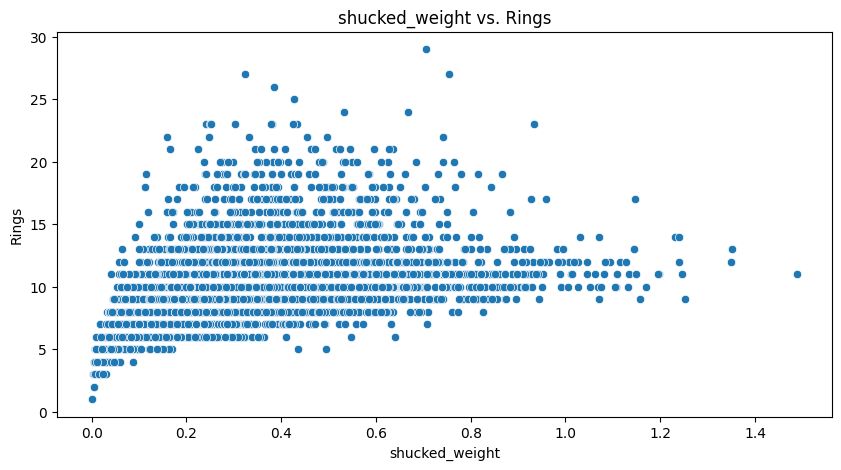

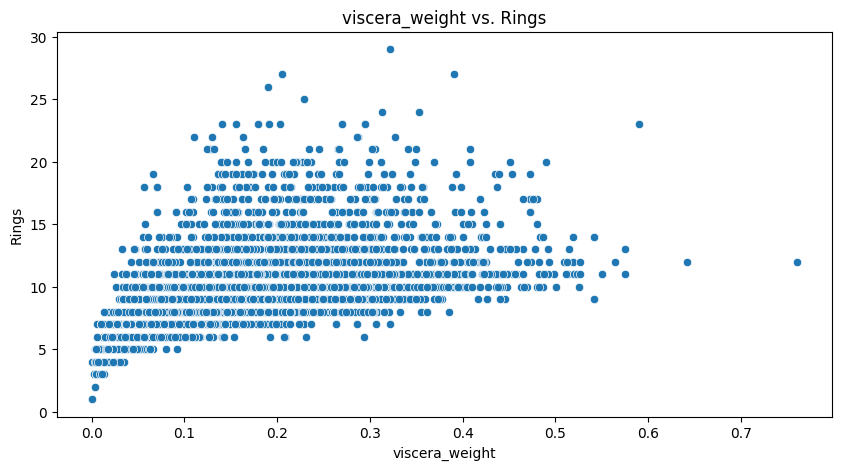

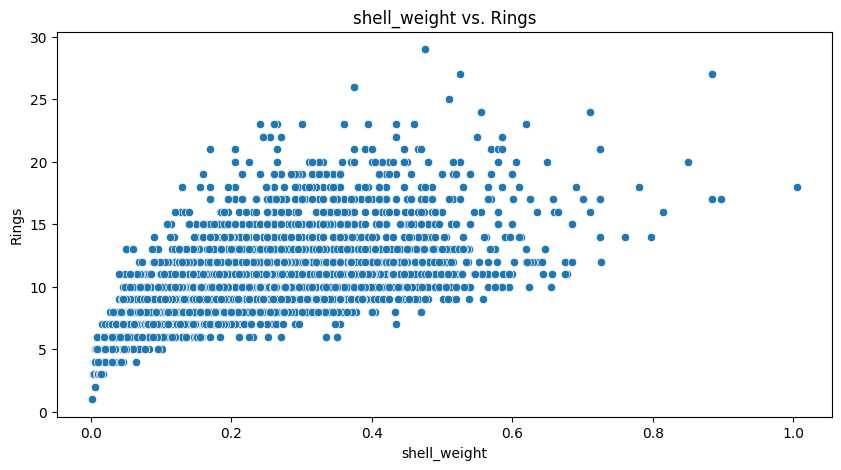

In [ ]:
# Scatter plots of features vs. rings
for feature in features:
    if feature != 'rings':
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=df[feature], y=df['rings'])
        plt.title(f'{feature} vs. Rings')
        plt.xlabel(feature)
        plt.ylabel('Rings')
        plt.show()


In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn import set_config

# Set the default transformation output to pandas
set_config(transform_output="pandas")



**Check Data Types**

In [ ]:
# a. Check data types
print("Data Types:")
print(df.dtypes)

Data Types:
sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object


 **Check for duplicates**

In [ ]:
# b. Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


*** Check for null values***

In [ ]:
null_values = df.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64


**Check for inconsistent categories in 'sex'**

In [ ]:
print(f"Unique values in 'sex' column: {df['sex'].unique()}")

Unique values in 'sex' column: ['M' 'F' 'I']


Separate the feature matrix (x) and target vector (y)

In [ ]:
# 3. Separate the feature matrix (X) and target vector (y)
X = df.drop(columns=['rings'])
y = df['rings']

4.	**Train/test split the data**

In [ ]:
# 4. Import the train_test_split function
from sklearn.model_selection import train_test_split

# Split the data with a random seed for reproducibility (random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (3341, 8)
Test data shape: (836, 8)


**Create a columnTransformer to preprocess the data**

In [ ]:
# 5. Import necessary preprocessing tools
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# a. Identify numeric and categorical columns
numeric_features = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']
categorical_features = ['sex']

# b. Create StandardScaler for numeric columns
scaler = StandardScaler()

# c. Create OneHotEncoder for categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' prevents the dummy variable trap

# d. Create tuples for the transformers
numeric_transformer = ('num', scaler, numeric_features)
categorical_transformer = ('cat', encoder, categorical_features)

# e. Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[numeric_transformer, categorical_transformer],
    verbose_feature_names_out=False  # f. Setting verbose_feature_names_out to False
)

*  **Fit the Column Transformer**

In [ ]:
# 6. Fit the preprocessor on the training data
preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['length', 'diameter', 'height',
                                  'whole_weight', 'shucked_weight',
                                  'viscera_weight', 'shell_weight']),
                                ('cat',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['sex'])],
                  verbose_feature_names_out=False)

**Transform the Data**

In [ ]:
# 7. Transform the training and test data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Transformed Training Data:")
print(X_train_processed.head())




Transformed Training Data:
        length  diameter    height  whole_weight  shucked_weight  \
4038  0.210175  0.369725 -0.347950     -0.323164       -0.325407   
1272 -0.419444 -0.542386 -0.936082     -0.665985       -0.480126   
3384 -1.846581 -1.859881 -1.641840     -1.388250       -1.354628   
3160 -2.098428 -2.113245 -1.759467     -1.453355       -1.363597   
3894 -0.251546 -0.289022 -0.112697     -0.409632       -0.437522   

      viscera_weight  shell_weight  sex_I  sex_M  
4038       -0.405130     -0.212132    1.0    0.0  
1272       -0.820932     -0.712419    1.0    0.0  
3384       -1.346395     -1.391379    0.0    0.0  
3160       -1.533734     -1.462848    1.0    0.0  
3894       -0.350299     -0.176398    0.0    1.0  


**Check the Transformed Training Data**

In [ ]:
# 8. Check transformed training data

# a. Confirm all columns are numeric dtypes
print("Data types of transformed training data:")
print(X_train_processed.dtypes)

# b. Confirm numeric features have been scaled
print("First few rows of transformed numeric features:")
print(X_train_processed[numeric_features].head())

Data types of transformed training data:
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
sex_I             float64
sex_M             float64
dtype: object
First few rows of transformed numeric features:
        length  diameter    height  whole_weight  shucked_weight  \
4038  0.210175  0.369725 -0.347950     -0.323164       -0.325407   
1272 -0.419444 -0.542386 -0.936082     -0.665985       -0.480126   
3384 -1.846581 -1.859881 -1.641840     -1.388250       -1.354628   
3160 -2.098428 -2.113245 -1.759467     -1.453355       -1.363597   
3894 -0.251546 -0.289022 -0.112697     -0.409632       -0.437522   

      viscera_weight  shell_weight  
4038       -0.405130     -0.212132  
1272       -0.820932     -0.712419  
3384       -1.346395     -1.391379  
3160       -1.533734     -1.462848  
3894       -0.350299     -0.176398  


Yes the features have been scaled and the columns have the same data type (float)

In [3]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Get the file name from the uploaded files
file_name = list(uploaded.keys())[0]

# Read the Excel file
df = pd.read_excel(file_name)


Saving New Microsoft Excel Worksheet.xlsx to New Microsoft Excel Worksheet (1).xlsx


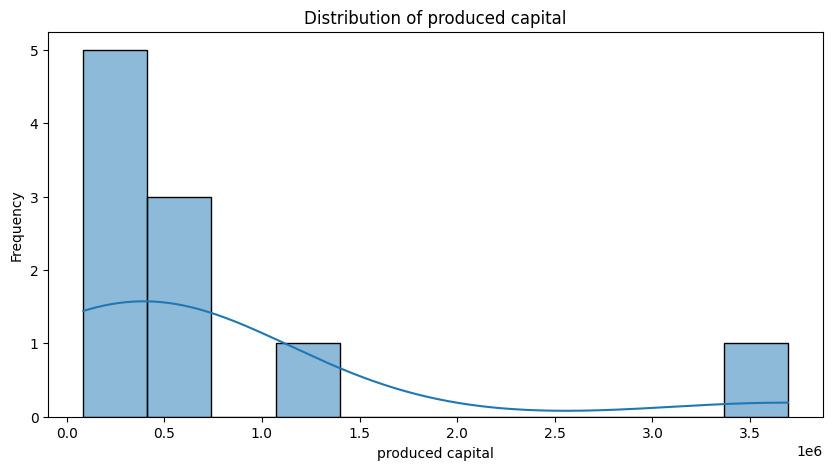

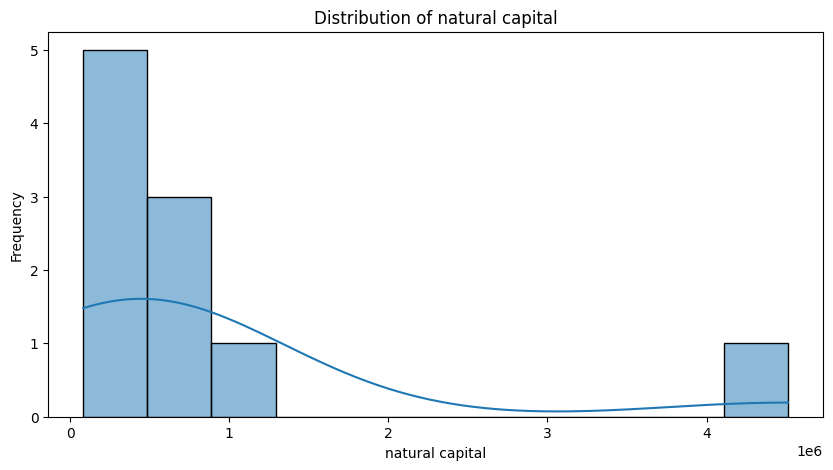

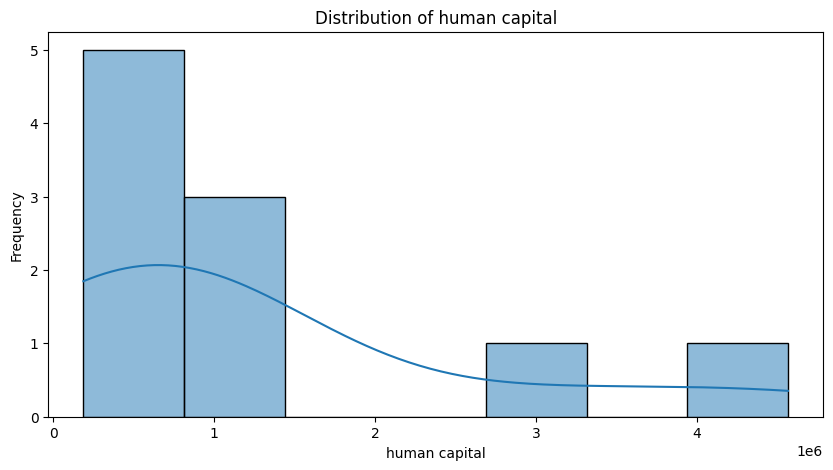

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions
features = ['produced capital', 'natural capital', 'human capital']

for feature in features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [4]:
# Plot histogram with kernel density estimation (KDE) curves
plt.figure(figsize=(12, 6))
bins = np.linspace(0, 5000000, 15)  # Define consistent bins for comparison

# Plot histograms
plt.hist(df["Produced Capital"], bins=bins, alpha=0.5, label="Produced Capital", color="blue", edgecolor="black", density=True)
plt.hist(df["Natural Capital"], bins=bins, alpha=0.5, label="Natural Capital", color="green", edgecolor="black", density=True)
plt.hist(df["Human Capital"], bins=bins, alpha=0.5, label="Human Capital", color="red", edgecolor="black", density=True)

# Add KDE curves
import seaborn as sns

sns.kdeplot(df["Produced Capital"], color="blue", linewidth=2, label="Produced Capital Curve")
sns.kdeplot(df["Natural Capital"], color="green", linewidth=2, label="Natural Capital Curve")
sns.kdeplot(df["Human Capital"], color="red", linewidth=2, label="Human Capital Curve")

# Customize plot
plt.xlabel("Capital Value")
plt.ylabel("Density")
plt.title("Comparison of Capital Types with Curves")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


NameError: name 'np' is not defined

<Figure size 1200x600 with 0 Axes>